In [1]:
import pyomo.environ as pyo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [2]:
t1 = hydro_opt()

In [3]:
help(t1.optimize)

Help on method optimize in module hydro_opt:

optimize(solve='gurobi', show_model=False, return_model=False, return_as_df=False) method of hydro_opt.hydro_opt instance
    optimizes the given Model by minimizing the combined cost for:
        - import by ship and pipeline for H2, NH3 and CH3OH
        - conversion of H2 to NH3 or CH3OH 
    
    solve: string, default "gurobi"
        value for pyomo.environ.SolverFactory()
        defines the used Solver
    show_model: bool, default False
        if True: calls .display() on the optimized model to show the model in console
    return_model: bool, default False
        if True: returns the optimized pyomo model
    return_as_df: bool, default False
        if True: returns the optimized values as pandas DataFrame
        only used in combination with return_model=True



In [4]:
t1_opt = t1.optimize(return_model=True, return_as_df=True)

In [5]:
t1_opt

,H2 Schiff,H2 Pipeline,H2 zu NH3 Schiff,H2 zu NH3 Pipeline,H2 für NH3 Umwandlung,H2 zu CH3OH Schiff,H2 zu CH3OH Pipeline,H2 für CH3OH Umwandlung,H2 für Umwandlung,H2 Import,NH3 Schiff,NH3 Pipeline,NH3 Import,CH3OH Schiff,CH3OH Pipeline,CH3OH Import,Gesamter Import
Land,,,,,,,,,,,,,,,,,
DZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AU,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


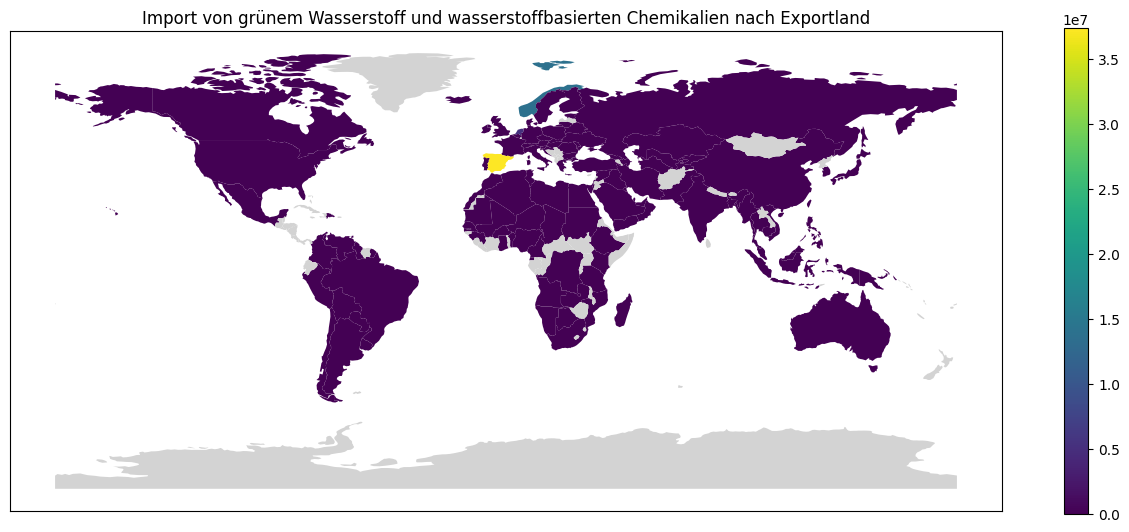

In [6]:
t1.visualize()

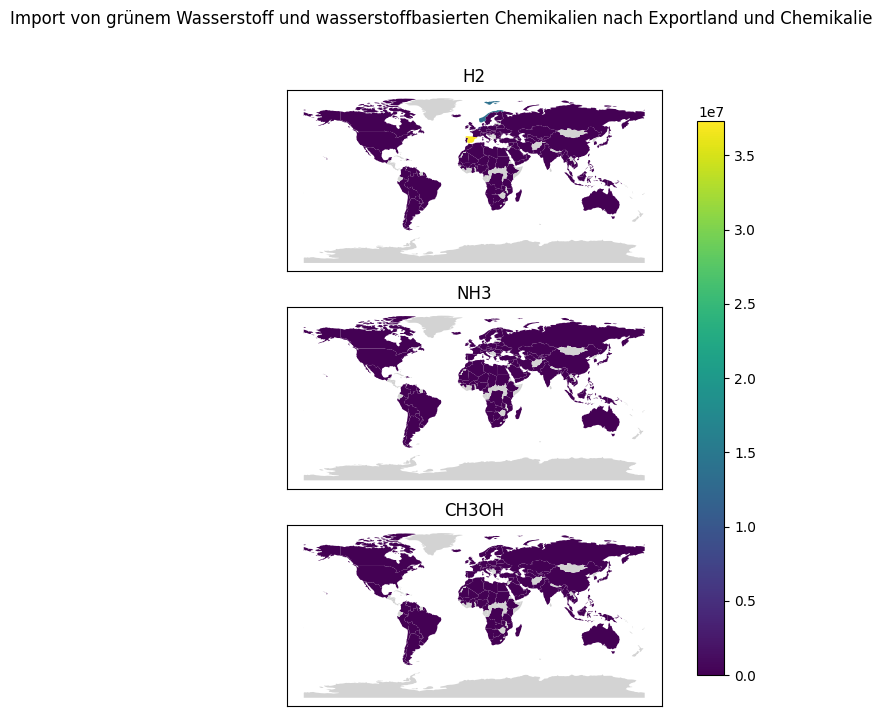

In [7]:
t1.visualize(what="commodities", figsize=(9,8))

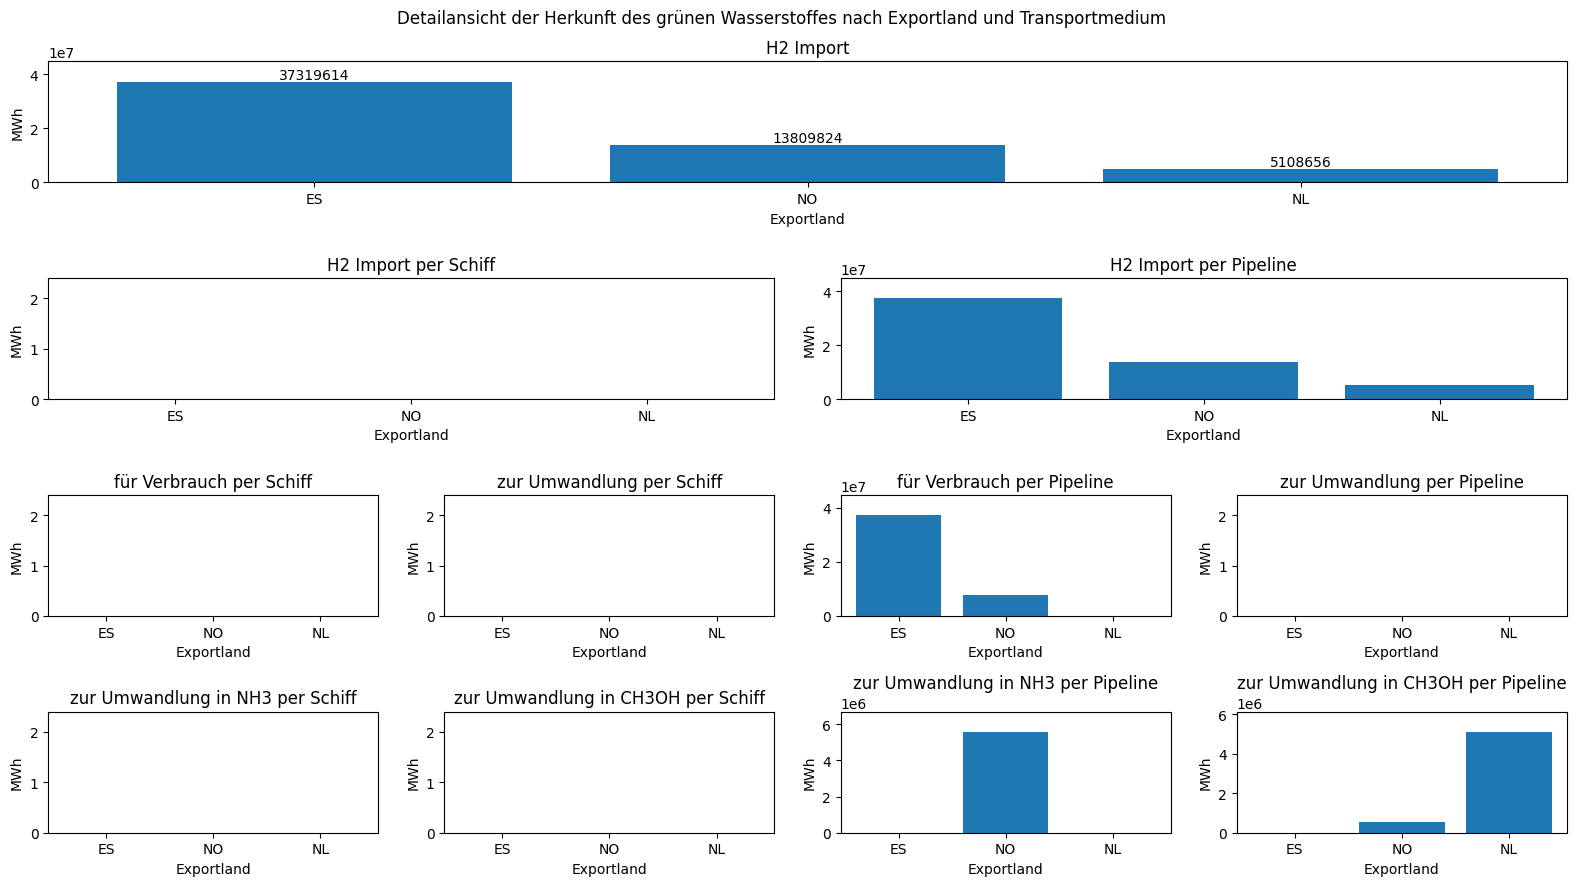

In [8]:
t1.visualize(what="hydrogen_conversion", vis_style="bar")

In [9]:
for col in t1_opt:
    print(col, t1_opt[col].unique())

H2 Schiff [0.]
H2 Pipeline [       0.          7680385.70519823 37319614.29480176]
H2 zu NH3 Schiff [0.]
H2 zu NH3 Pipeline [      0.         5571428.57142857]
H2 für NH3 Umwandlung [      0.         5571428.57142857]
H2 zu CH3OH Schiff [0.]
H2 zu CH3OH Pipeline [      0.         5108656.06534238  558010.60132429]
H2 für CH3OH Umwandlung [      0.         5108656.06534238  558010.60132429]
H2 für Umwandlung [      0.         5108656.06534238 6129439.17275286]
H2 Import [       0.          5108656.06534238 13809824.87795109 37319614.29480176]
NH3 Schiff [0.]
NH3 Pipeline [0.]
NH3 Import [0.]
CH3OH Schiff [0.]
CH3OH Pipeline [0.]
CH3OH Import [0.]
Gesamter Import [       0.          5108656.06534238 13809824.87795109 37319614.29480176]
H2 Gesamt Schiff [0.]
H2 Gesamt Pipeline [       0.          5108656.06534238 13809824.87795109 37319614.29480176]
H2 für Umwandlung Schiff [0.]
H2 für Umwandlung Pipeline [0.]
